# Summary of Findings

### Introduction
For our study, we will be investigating the NYPD dataset that contains data on 12,000 civillan complaints filled against NYPD police officers. We pursued the question of whether or not white officer vs non-white officer complaint cases are more likely to go against the officer. 

### Cleaning and EDA

During cleaning we took out '0' and 'Unknown' values from columns that contained them. We also combined the month and year the complaint was recieved into a new column and put it in datetime format. We did the same for the month and year the complaint was closed so that the two would be easily comparable. We added a new column 'Timelapse' in which we compared the difference. Two more columns were added to help with our question. The first was a column 'white' that had true or false values based on if the officer was white or not. The second, 'outcome', highlighted the outcome of the complaint case, without extra descriptions.

During EDA we looked at many distributions of singular variables, as well as comparing them to others to see if there were any correlations. We investigated the officer and complainant ethnicitiy distributions. We analyzed the proportion of officers of each ethnicity, as well as comparing the average ages of officers based on their ethnicities. Finally, we took a look at the outcomes of these complaints based on officer gender and ethnicity, specifically White and Non-white. Our takeaways from these investigations can be viewed above the tables and plots regarding the various distributions.
### Assessment of Missingness
The shield number column seemed to have the most occurences of missing data. Many values in the orginal date frame were 0, which probably means that they were never given a shield number. One Reason that could have caused this to happen is age, so that is what we looked at. for out test statistic, we looked at the average age of the officer for when there shield number is null or not. We observed that this difference was 0.9098 years on average. We then preformed a permutation test where we shuffled the ages, and calculated the mean difference in ages between the two groups. If the distribution of ages for null and non null sheild numbers were from the same distribution, then we would hope to find that some of the difference in the premuataion test would be as large as the test_stat. This never happened, allowing us to assume that shield number is atleast NMAR. Our p-value was 0.00

### Hypothesis Test
Null Hypothesis: White officer complaint cases and Non-white officer complaint cases are equally as likely to go against the officer.

Alternative Hypothesis: Non-white officer complaintant cases are more likely to go against the officer than White officer cases.

Test Statistic: 0.015: The normalized difference in percent of outcomes that are substantiated between White and Non-white officers. 

Result: P-value: 0.001 --> This leads us to believe that Non-white officer complaint case results and White officer complaint cases do not come from the same distribution, and could mean that they are handled differently.

# Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

In [2]:
# reading in data
df = pd.read_csv("allegations_202007271729.csv")
#df

In [3]:
# cleaning the data by replacing the value unknown and 0 with nulls
clean = df.where(df != "Unknown").where(df != 0)

In [4]:
# helper function
def _substantial(outcome):
    if outcome[:13] == 'Substantiated':
        return "Substantiated"
    elif outcome[:10] == "Exonerated":
        return 'Exonerated'
    else:
        return "Unsubstantiated"

In [5]:
#helper function
def _white(mos_ethn):
    if mos_ethn == "White":
        return True
    return False

In the cell below, we converted all the times to date time and made them into three columns, date received, date closed and the time lapse between the two dates. Also we added two columns to help with our question, "white" which contains booleans of whether the officer was white and "outcome", which maps the board dispostion into three categories, "Substantiated", "Exonerated" and "Unsubstantiated".

In [6]:
# cleaning the time data
clean["date_recieved"] = pd.to_datetime(clean.month_received.apply(str) +"-"+ clean.year_received.apply(str))
clean["date_closed"] = pd.to_datetime(clean.month_closed.apply(str) +"-"+ clean.year_closed.apply(str))
clean_time = clean.drop(columns = ["month_received",'year_received',"month_closed",'year_closed'])
clean_time["time_lapse"] = (clean["date_closed"] -clean["date_recieved"])
#adding new columns to help with question
clean_time['white'] = clean_time.mos_ethnicity.apply(_white)
clean_time["outcome"] = clean.board_disposition.apply(_substantial)
#clean_time

### Cleaning and EDA

Below we analyze the different amounts of officers pertaining to each race. We notice that the majority of officers are White. There are also a significant amount of Hispanic and Black officers, and under 2500 Asian and American Indian officers.

<BarContainer object of 5 artists>

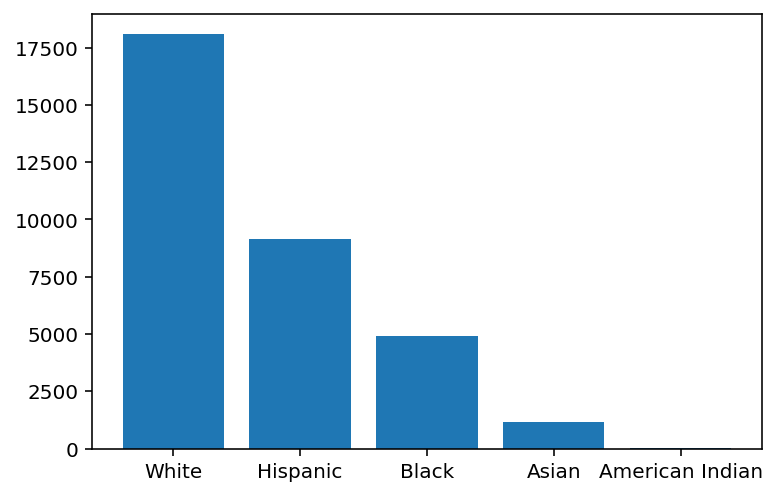

In [7]:
# Univarate
officer_ethnicity = clean_time['mos_ethnicity'].value_counts().to_frame()
plt.bar(x=officer_ethnicity.index, height=officer_ethnicity['mos_ethnicity'])

Below we analyze the different amounts of complainants pertaining to each race. We notice that the majority of complainants are Black, the second most being Hispanic. This differs from the officer counts we saw above.

<BarContainer object of 7 artists>

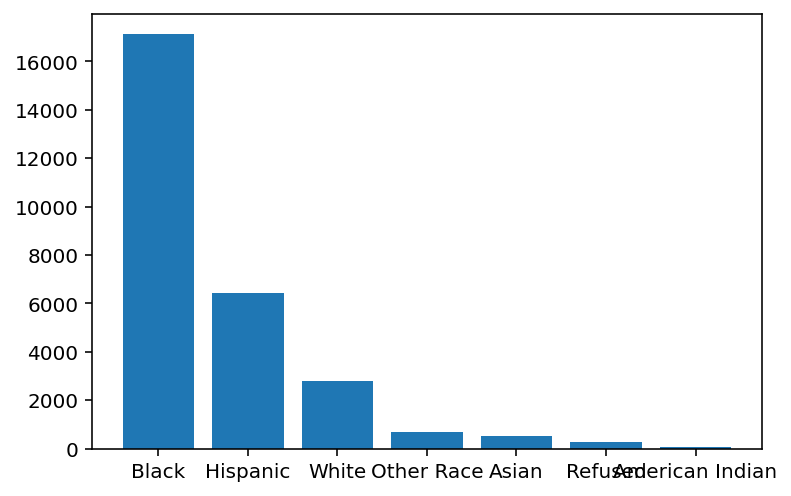

In [8]:
complainant_ethnicity = clean_time['complainant_ethnicity'].value_counts().to_frame()
plt.bar(x=complainant_ethnicity.index, height=complainant_ethnicity['complainant_ethnicity'])

BIVARTE
Here we compare the average age of officers of different ethnicities. We can see that the average officer, no matter the ethnicity is around 31-33 years old.

In [9]:
clean_time.pivot_table(values = ['mos_age_incident'], columns = ['mos_ethnicity'])

mos_ethnicity,American Indian,Asian,Black,Hispanic,White
mos_age_incident,31.15625,32.467742,33.229285,32.157268,32.196691


Here we analyze the proportion of officers of different ethnicities in the NYPD complaints database. Half of the complaints are made about White officers, a quarter about Hispanic officers and the rest about Black, Asian and American Indian officers.

In [10]:
ethnicity_counts = clean_time['mos_ethnicity'].value_counts().to_frame()
ethnicity_counts['mos_ethnicity'] = ethnicity_counts['mos_ethnicity']/ethnicity_counts['mos_ethnicity'].sum()
ethnicity_counts = ethnicity_counts.rename(columns = {'mos_ethnicity':'Proportion of Officers'})
ethnicity_counts

,Proportion of Officers
White,0.541819
Hispanic,0.274297
Black,0.147611
Asian,0.035314
American Indian,0.000959


AGGREGATE ANALYSIS
Below we broke down outcomes of complaint cases by gender of officers. 36% of cases went against female officers while only 24% of cases went against male officers. This is an interesting difference, however it may be due to the fact that there are many more cases in general submitted against male officers.

In [11]:
grouped = clean_time.groupby(['mos_gender', 'outcome']).count()['unique_mos_id'].to_frame()
props = grouped/clean_time.groupby(['mos_gender']).count()['unique_mos_id'].to_frame()
props = props.rename(columns={'unique_mos_id':'Total Proportions'})
props

Total Proportions
mos_gender outcome                           
F          Exonerated                0.228409
           Substantiated             0.360227
           Unsubstantiated           0.411364
M          Exonerated                0.291379
           Substantiated             0.242642
           Unsubstantiated           0.465979

Next we looked at the breakdown of counts for outcome/ board dispostion, ethnicity and whether they are white or not. The two most interesting take aways were that, most police dispostions were unsubstantial and that there is about as many non-whites on the force as whites.

In [12]:
amounts_of_ethnicity = clean_time.groupby("mos_ethnicity")["unique_mos_id"].count()
amounts_of_white = clean_time.groupby("white")["unique_mos_id"].count()
amounts_of_outcome = clean_time.groupby("outcome")["unique_mos_id"].count()
amounts_of_outcome,amounts_of_ethnicity,amounts_of_white

(outcome
 Exonerated          9609
 Substantiated       8301
 Unsubstantiated    15448
 Name: unique_mos_id, dtype: int64,
 mos_ethnicity
 American Indian       32
 Asian               1178
 Black               4924
 Hispanic            9150
 White              18074
 Name: unique_mos_id, dtype: int64,
 white
 False    15284
 True     18074
 Name: unique_mos_id, dtype: int64)

Next, we looked at how the time between the case opening and closing would change based on the outcome and whether they were white or not. On average whites cases took 8 less days than non-whites, and when the police officer was found to be in the wrong, the case took on average 8 less days than if they were found not guilty and 14 less days than if nothing was proven.

In [13]:
time_of_white = clean_time.groupby("white")["time_lapse"].mean(numeric_only = False)
time_of_outcome = clean_time.groupby("outcome")["time_lapse"].mean(numeric_only = False)
time_of_white,time_of_outcome

(white
 False   300 days 05:21:27.935095524
 True    292 days 22:11:29.166758880
 Name: time_lapse, dtype: timedelta64[ns],
 outcome
 Exonerated        295 days 17:08:38.139244460
 Substantiated     287 days 16:23:35.540296348
 Unsubstantiated   301 days 05:27:00.093215952
 Name: time_lapse, dtype: timedelta64[ns])

Finally, we looked at the rates in which white and non-white officers recieved there decison. Whites were exonerated about 2% more often and non whites were charged about 2% more often.

In [14]:
white_outcome = clean_time.groupby(["white","outcome"])["unique_mos_id"].count()
white_outcome_ratios = white_outcome/clean_time.groupby("white")["unique_mos_id"].count()
white_outcome_ratios

white  outcome        
False  Exonerated         0.278723
       Substantiated      0.257197
       Unsubstantiated    0.464080
True   Exonerated         0.295950
       Substantiated      0.241784
       Unsubstantiated    0.462266
Name: unique_mos_id, dtype: float64

### Assessment of Missingness

In [15]:
# observed test statistic
clean_time['is_null'] = clean_time['shield_no'].isnull()
test_stat = clean_time.groupby('is_null')['mos_age_incident'].mean().diff().abs().iloc[-1]
test_stat

0.9097927649959061

In [16]:
n_repetitions = 1000

means = []
for _ in range(n_repetitions):
    
    # shuffle the gender column
    shuffled_col = (
        clean_time['mos_age_incident']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    # put them in a table
    shuffled = (
        clean_time
        .assign(**{
            'mos_age_incident': shuffled_col,
            'is_null': clean_time['shield_no'].isnull()
        })
    )
    mean = shuffled.groupby('is_null')['mos_age_incident'].mean().diff().abs().iloc[-1]
    means.append(mean)

In [17]:
p_value = np.array(means>test_stat).mean()
p_value 

0.0

### Hypothesis Test

In [18]:
# observed test statistic
white_outcome = clean_time.groupby(["white","outcome"])["unique_mos_id"].count()
white_outcome_ratios = white_outcome/clean_time.groupby("white")["unique_mos_id"].count()
test = abs(white_outcome_ratios[0][2] - white_outcome_ratios[1][2])
test

0.0018138449516493793

In [19]:
n_repetitions = 2000

diffs = []
for _ in range(n_repetitions):
    
    # shuffle the gender column
    shuffled_col = (
        clean_time['outcome']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    # put them in a table
    shuffled = (
        clean_time
        .assign(**{
            'outcome': shuffled_col,
            "white": clean_time["white"]
        })
    )
    white_outcome = shuffled.groupby(["white","outcome"])["unique_mos_id"].count()
    white_outcome_ratios = white_outcome/shuffled.groupby("white")["unique_mos_id"].count()
    test_stats = abs(white_outcome_ratios[0][2] - white_outcome_ratios[1][2])
    
    diffs.append(test_stats)

In [20]:
p_value = np.array(diffs>test).mean()
p_value

0.7285